```
Copyright 2021 Twitter, Inc.
SPDX-License-Identifier: Apache-2.0
```

## Image Crop Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twitter-research/image-crop-analysis/blob/master/notebooks/Image%20Crop%20Analysis.ipynb)

In [1]:
import logging
import shlex
import subprocess
import sys
from collections import namedtuple
from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

logging.basicConfig(level=logging.ERROR)

In [2]:
import platform

BIN_MAPS = {"Darwin": "mac", "Linux": "linux"}

HOME_DIR = Path("../").expanduser()

try:
    import google.colab
    ! pip install pandas scikit-learn scikit-image statsmodels requests dash
    ! [[ -d image-crop-analysis ]] || git clone https://github.com/Vivdaddy/image-crop-analysis
    HOME_DIR = Path("./image-crop-analysis").expanduser()
    IN_COLAB = True
except:
    IN_COLAB = False

sys.path.append(str(HOME_DIR / "src"))
bin_dir = HOME_DIR / Path("./bin")
bin_path = bin_dir / BIN_MAPS[platform.system()] / "candidate_crops"
model_path = bin_dir / "fastgaze.vxm"
data_dir = HOME_DIR / Path("./data/")
data_dir.exists()

True

In [3]:
img_path = next(data_dir.glob("./*.jpg"))
img_path

PosixPath('../data/disabled_49.jpg')

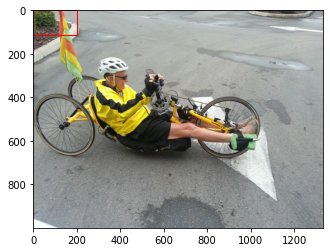

In [4]:
# Dont need to run
img = mpimg.imread(img_path)
plt.imshow(img)
plt.gca().add_patch(
    Rectangle((0, 0), 200, 112, linewidth=1, edgecolor="r", facecolor="none")
)

In [5]:
# Don't need to run
str(img_path.absolute())

'/home/vivek/Documents/Gatech/Research/twitter_challenge/image-crop-analysis/notebooks/../data/disabled_49.jpg'

In [6]:
cmd = f"{str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points"
cmd

"../bin/linux/candidate_crops ../bin/fastgaze.vxm '/home/vivek/Documents/Gatech/Research/twitter_challenge/image-crop-analysis/notebooks/../data/disabled_49.jpg' show_all_points"

In [7]:
output = subprocess.check_output(cmd, shell=True)  # Success!
print(output.splitlines())

[b'366 299', b'0 0 1333 746', b'0 0 1000 1000', b'0 0 877 1000', b'116 0 500 1000', b'0 0 1333 1000', b'33.325 33.325 0.695576', b'99.975 33.325 1.07346', b'166.625 33.325 1.14488', b'233.275 33.325 0.729254', b'299.925 33.325 0.336385', b'366.575 33.325 0.0592845', b'433.225 33.325 -0.0504252', b'499.875 33.325 -0.0694647', b'566.525 33.325 -0.106544', b'633.175 33.325 -0.125296', b'699.825 33.325 -0.13748', b'766.475 33.325 -0.136889', b'833.125 33.325 -0.141353', b'899.775 33.325 -0.141256', b'966.425 33.325 -0.159443', b'1033.08 33.325 -0.154307', b'1099.72 33.325 -0.154675', b'1166.38 33.325 -0.10292', b'1233.03 33.325 -0.0223874', b'1299.68 33.325 0.110726', b'33.325 99.975 1.07904', b'99.975 99.975 1.73347', b'166.625 99.975 2.05091', b'233.275 99.975 1.55583', b'299.925 99.975 1.18219', b'366.575 99.975 0.800608', b'433.225 99.975 0.484193', b'499.875 99.975 0.245555', b'566.525 99.975 -0.0620984', b'633.175 99.975 -0.144331', b'699.825 99.975 -0.180327', b'766.475 99.975 -0.19

In [8]:
! {str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points | head

showAllPoints=true, argv[3]=show_all_points
366 299
0 0 1333 746
0 0 1000 1000
0 0 877 1000
116 0 500 1000
0 0 1333 1000
33.325 33.325 0.695576
99.975 33.325 1.07346
166.625 33.325 1.14488
233.275 33.325 0.729254


In [9]:
from crop_api import ImageSaliencyModel, is_symmetric, parse_output, reservoir_sampling

In [10]:
parse_output(output).keys()

dict_keys(['salient_point', 'crops', 'all_salient_points'])

In [11]:
model = ImageSaliencyModel(crop_binary_path=bin_path, crop_model_path=model_path)

In [12]:
plt.matplotlib.__version__

'3.4.2'

In [13]:
list(data_dir.glob("./*.jpg"))

[PosixPath('../data/disabled_49.jpg'),
 PosixPath('../data/abled_36.jpg'),
 PosixPath('../data/disabled_29.jpg'),
 PosixPath('../data/abled_46.jpg'),
 PosixPath('../data/disabled_18.jpg'),
 PosixPath('../data/disabled_46.jpg'),
 PosixPath('../data/abled_48.jpg'),
 PosixPath('../data/abled_4.jpg'),
 PosixPath('../data/disabled_34.jpg'),
 PosixPath('../data/disabled_50.jpg'),
 PosixPath('../data/abled_15.jpg'),
 PosixPath('../data/disabled_31.jpg'),
 PosixPath('../data/abled_50.jpg'),
 PosixPath('../data/abled_41.jpg'),
 PosixPath('../data/abled_19.jpg'),
 PosixPath('../data/disabled_24.jpg'),
 PosixPath('../data/disabled_3.jpg'),
 PosixPath('../data/disabled_47.jpg'),
 PosixPath('../data/disabled_27.jpg'),
 PosixPath('../data/abled_3.jpg'),
 PosixPath('../data/disabled_36.jpg'),
 PosixPath('../data/abled_42.jpg'),
 PosixPath('../data/disabled_43.jpg'),
 PosixPath('../data/abled_37.jpg'),
 PosixPath('../data/abled_21.jpg'),
 PosixPath('../data/abled_32.jpg'),
 PosixPath('../data/abled_5.

None 614 946
showAllPoints=true, argv[3]=show_all_points


(401.462, 401.462)

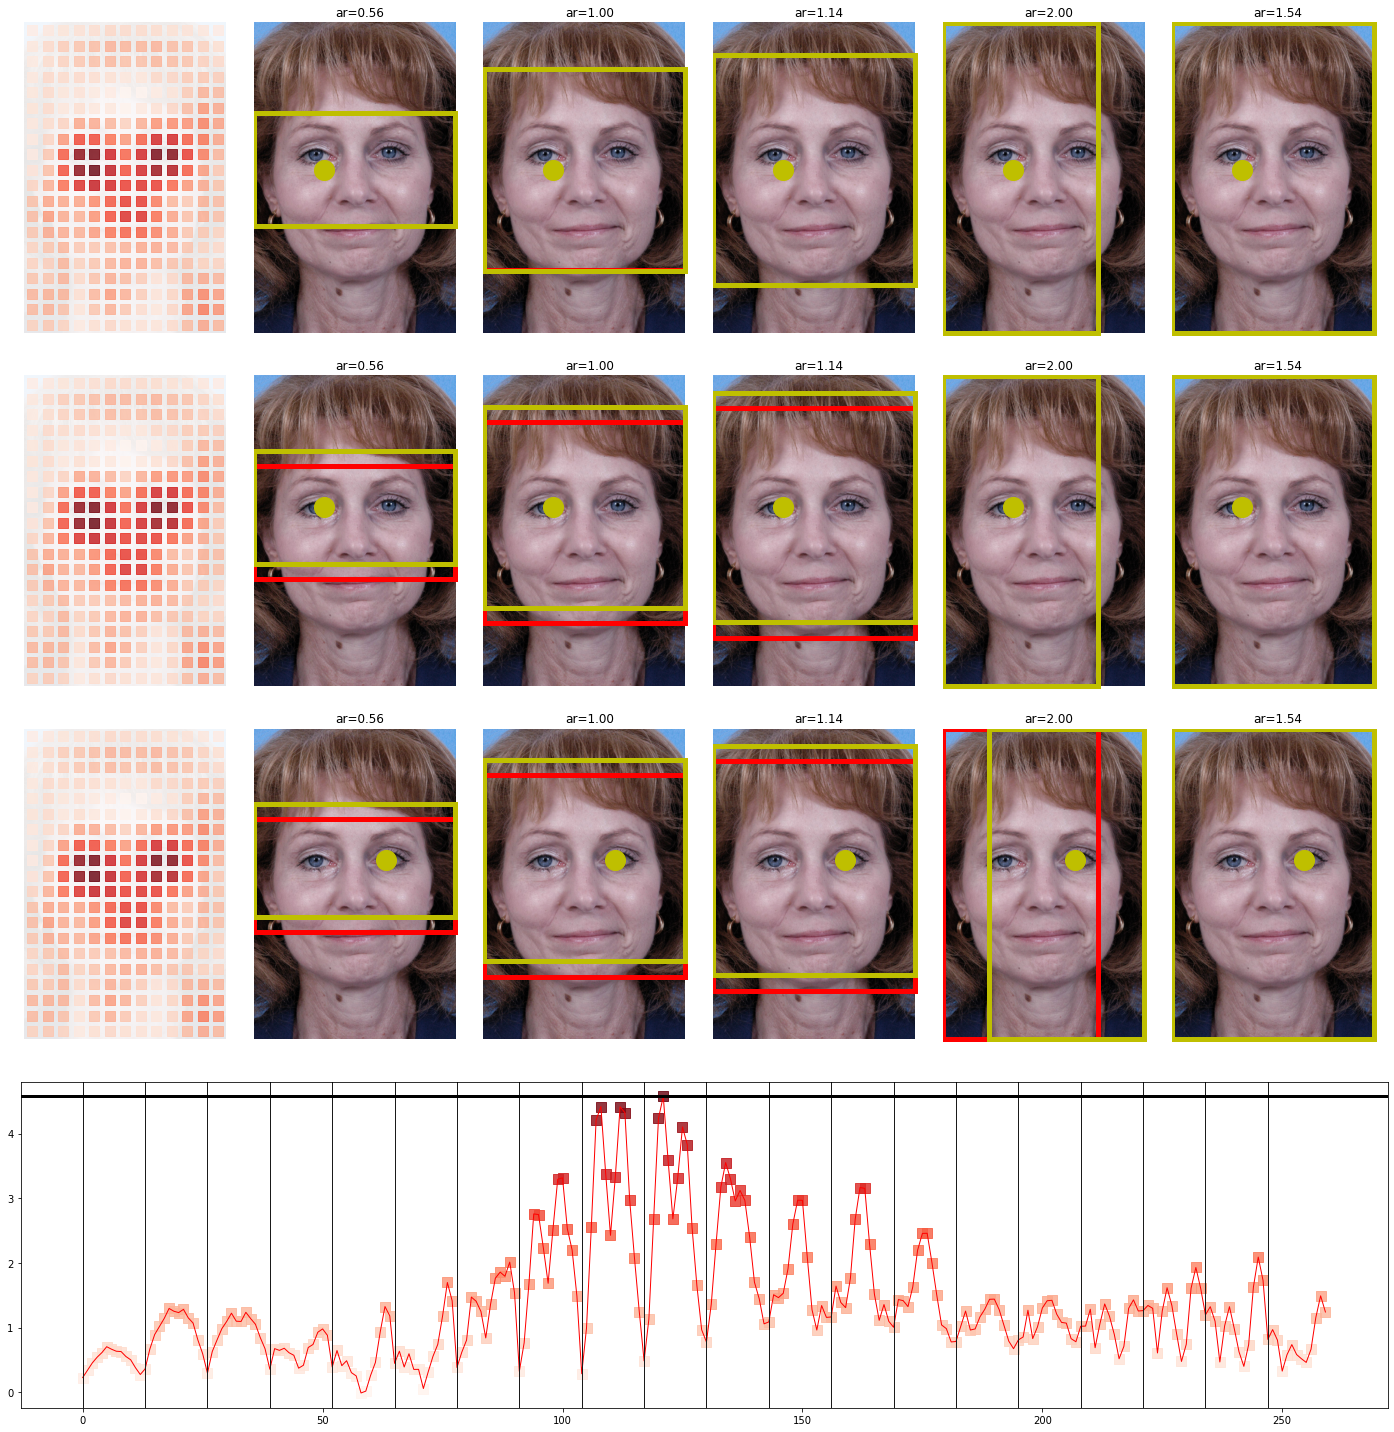

In [14]:
model.plot_img_crops(data_dir / Path("./abled_29.jpg"), topK=3)
# plt.savefig("dummy_top3.jpeg", bbox_inches="tight")

## Crop an image generated using combination of images

In [15]:
from PIL import Image

from image_manipulation import join_images
my_num = [str(x) for x in range(1, 51)]
# exclude = [str(x) for x in range(26, 51)]
# my_num = [x for x in my_num if x not in exclude]
my_num

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50']

In [16]:
images = [Image.open(x) for x in data_dir.glob("./*.jpg")]
img, x_sep, y_sep = join_images(images[:8], col_wrap=2, img_size=(128, -1))

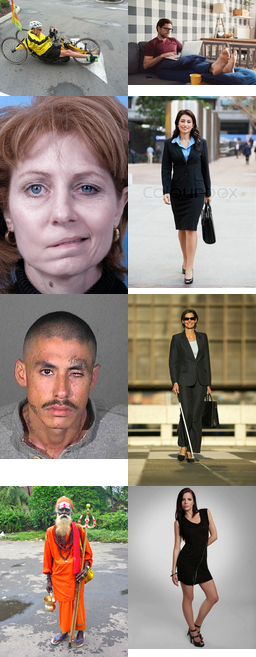

In [17]:
img

In [18]:
from tqdm import tqdm
# Initialize my dictionary
my_results_dict = {}
for num in my_num:
    my_results_dict[num] = {'d_a': '', 'a_d': ''}

# Disabled Abled Horizontal Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./disabled_" + num + ".jpg")),
        Image.open(data_dir / Path("./abled_" + num + ".jpg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if x > x_sep:
        my_results_dict[num]['d_a'] = 'a'
    else:
        my_results_dict[num]['d_a'] = 'd'


  0%|          | 0/50 [00:00<?, ?it/s]/tmp/tmpxf5d7z_1



UnidentifiedImageError: cannot identify image file '/tmp/tmpxf5d7z_1'

In [18]:
# Abled Disabled Horizontal Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./abled_" + num + ".jpg")),
        Image.open(data_dir / Path("./disabled_" + num + ".jpg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if x > x_sep:
        my_results_dict[num]['a_d'] = 'd'
    else:
        my_results_dict[num]['a_d'] = 'a'

  0%|          | 0/50 [00:00<?, ?it/s]/tmp/tmp4mrm5c5k



UnidentifiedImageError: cannot identify image file '/tmp/tmp4mrm5c5k'

In [13]:
# Find stats here, for horizontal stitching
import copy
count_clearly_abled_ad = 0
count_clearly_disabled_ad = 0
count_confused_ad = 0

for num in my_num:
    if my_results_dict[num]['a_d'] == 'a':
        count_clearly_abled_ad += 1
    elif my_results_dict[num]['a_d'] == 'd':
        count_clearly_disabled_ad += 1
    else:
        count_confused_ad += 1
print("horizontal stitching:")
print("Abled_ Disabled:")
print("disabled", count_clearly_disabled_ad)
print("abled", count_clearly_abled_ad)
print("confused", count_confused_ad)
print("____________________")


count_clearly_abled_da = 0
count_clearly_disabled_da = 0
count_confused_da = 0
for num in my_num:
    if my_results_dict[num]['d_a'] == 'a':
        count_clearly_abled_da += 1
    elif my_results_dict[num]['d_a'] == 'd':
        count_clearly_disabled_da += 1
    else:
        count_confused_da += 1

print("horizontal stitching:")
print("Disabled_Abled:")
print("disabled", count_clearly_disabled_da)
print("abled", count_clearly_abled_da)
print("confused", count_confused_da)
print("____________________")

count_clearly_abled = 0
count_clearly_disabled = 0
count_confused = 0
for num in my_num:
    if my_results_dict[num]['d_a'] == 'a' and my_results_dict[num]['a_d'] == 'a':
        count_clearly_abled += 1
    elif my_results_dict[num]['a_d'] == 'd' and my_results_dict[num]['d_a'] == 'd':
        count_clearly_disabled += 1
    else:
        count_confused += 1

print("Horizontal stitching")
print("Combined")
print("disabled", count_clearly_disabled)
print("abled", count_clearly_abled)
print("confused", count_confused)
print("____________________")

my_results_dict_horizontal = copy.deepcopy(my_results_dict)

horizontal stitching:
Abled_ Disabled:
disabled 0
abled 0
confused 50
____________________
horizontal stitching:
Disabled_Abled:
disabled 0
abled 0
confused 50
____________________
Horizontal stitching
Combined
disabled 0
abled 0
confused 50
____________________


In [22]:
my_results_dict = {}
for num in my_num:
    my_results_dict[num] = {'d_a': '', 'a_d': ''}

# Disabled Abled Vertical Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./disabled_" + num + ".jpg")),
        Image.open(data_dir / Path("./abled_" + num + ".jpg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=1, img_size=(128, 128), padding=0)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if y > y_sep:
        my_results_dict[num]['d_a'] = 'a'
    else:
        my_results_dict[num]['d_a'] = 'd'

  0%|          | 0/50 [00:00<?, ?it/s]showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
  4%|▍         | 2/50 [00:00<00:02, 16.69it/s]showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
/tmp/tmp58nqb0zn
None 128 177
/tmp/tmptn26spbi
None 50 256
/tmp/tmpgwkb066t
None 85 256
/tmp/tmp660z7bnr
None 101 256
showAllPoints=true, argv[3]=show_all_points
 10%|█         | 5/50 [00:00<00:02, 19.44it/s]showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
 14%|█▍        | 7/50 [00:00<00:02, 19.52it/s]/tmp/tmpe3ilb1ml
None 86 256
/tmp/tmpx0h8cmvg
None 100 256
/tmp/tmplsim9ctw
None 90 256
/tmp/tmprdyztjfd
None 92 256
showAllPoints=true, argv[3]=show_all_points
showAllPoints=true, argv[3]=show_all_points
 18%|█▊        | 9/50 [00:00<00:02, 18.30it/s]showAllPoints=true, argv[3]=show_all_points
/tmp/tmp_rberz6k
None 128 256
/tmp/tmp8l6k9zgy
None 128 182
showAllPoints=true, argv[3]=show_all_points

In [16]:
# Abled Disabled Vertical Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./abled_" + num + ".jpg")),
        Image.open(data_dir / Path("./disabled_" + num + ".jpg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=1, img_size=(128, 128), padding=0)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if y > y_sep:
        my_results_dict[num]['a_d'] = 'd'
    else:
        my_results_dict[num]['a_d'] = 'a'

  0%|          | 0/50 [00:00<?, ?it/s]/tmp/tmps5tl08ia



UnidentifiedImageError: cannot identify image file '/tmp/tmps5tl08ia'

In [25]:
count_clearly_abled_ad = 0
count_clearly_disabled_ad = 0
count_confused_ad = 0

for num in my_num:
    if my_results_dict[num]['a_d'] == 'a':
        count_clearly_abled_ad += 1
    elif my_results_dict[num]['a_d'] == 'd':
        count_clearly_disabled_ad += 1
    else:
        count_confused_ad += 1
print("horizontal stitching:")
print("Abled_ Disabled:")
print("disabled", count_clearly_disabled_ad)
print("abled", count_clearly_abled_ad)
print("confused", count_confused_ad)
print("____________________")


count_clearly_abled_da = 0
count_clearly_disabled_da = 0
count_confused_da = 0
for num in my_num:
    if my_results_dict[num]['d_a'] == 'a':
        count_clearly_abled_da += 1
    elif my_results_dict[num]['d_a'] == 'd':
        count_clearly_disabled_da += 1
    else:
        count_confused_da += 1

print("vertical stitching:")
print("Disabled_Abled:")
print("disabled", count_clearly_disabled_da)
print("abled", count_clearly_abled_da)
print("confused", count_confused_da)
print("____________________")

count_clearly_abled = 0
count_clearly_disabled = 0
count_confused = 0
for num in my_num:
    if my_results_dict[num]['d_a'] == 'a' and my_results_dict[num]['a_d'] == 'a':
        count_clearly_abled += 1
    elif my_results_dict[num]['a_d'] == 'd' and my_results_dict[num]['d_a'] == 'd':
        count_clearly_disabled += 1
    else:
        count_confused += 1

print("vertical stitching")
print("Combined")
print("disabled", count_clearly_disabled)
print("abled", count_clearly_abled)
print("confused", count_confused)
print("____________________")

my_results_dict_vertical = copy.deepcopy(my_results_dict)

horizontal stitching:
Abled_ Disabled:
disabled 20
abled 30
confused 0
____________________
vertical stitching:
Disabled_Abled:
disabled 19
abled 31
confused 0
____________________
vertical stitching
Combined
disabled 17
abled 28
confused 5
____________________
